In [ ]:
# importing the necessary libraries
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

<img src="http://drive.google.com/uc?export=view&id=18q7KL4aV6McMtaid_1Let2aGkw6d4QYn" width=45%>

In [ ]:
class GridWorld:
    """

    The environment: (see image)
    * cells: the agent can step on a cell. There is exactly one cell to start from.
    This is the top left corner. There is one terminal cell where the walking ends,
    the agent can not leave it (blue).
    * obstacles: there are cells where the agent can not step. (gray)
    * agent: it can move from one cell to an other neighboring cell.
    Possible directions: up, down, left, right. Each transition happens with probability 1.
    * reward: after each transition the agent receives -1 point. In the terminal cell, no reward
    received anymore.
    """
    def __init__(self, size, start_cell, obstacles, terminating_state):
        self.size = size
        self.start = start_cell
        self.obstacles = obstacles
        self.termin = terminating_state
        self.current_cell = self.start

    def reset(self):
        # ----- reset the current cell to the start cell to start again -----
        if self.start is None:
            self.current_cell = self.start
        else:
            self.current_cell = self.start

    def transition(self, cell, action):
        # ----- IMPLEMENT FUNCTION -----
        # cell = (row, column) indices
        # action: 0 left, 1 up, 2 right, 3 down
        # returns: What will be the next state

        r, c = cell
        if cell == self.termin:
            self.current_cell = (r, c)
            return (r, c)
        if action == 0:  # left
            c_next = max(0, c - 1)
            r_next = r
        elif action == 1:  # up
            c_next = c
            r_next = max(0, r - 1)
        elif action == 2:  # right
            c_next = min(self.size[1]-1, c + 1)
            r_next = r
        elif action == 3:  # down
            c_next = c
            r_next = min(self.size[0]-1, r + 1)
        if (r_next, c_next) in self.obstacles:
            self.current_cell = (r, c)
            return (r, c)
        self.current_cell = (r_next, c_next)
        return (r_next, c_next)

    def reward(self, cell, action):
        # ----- RETURN REWARD -----
        # -1 if not in the terminal state
        if cell == self.termin:
            return 0
        return -1

    def in_terminal(self):
        return self.current_cell == self.termin

In [ ]:
class DPsolver:
    """
    This solver is based on the Bellman-equation and it is
    solved iteratively .
    The action-value is used to represent the utility of the
    actions and states.
    """

    def __init__(self, gridworld, gamma, iterations):
        # setting parametes according to the input parameters
        self.gridworld = gridworld
        self.gamma = gamma
        self.iterations = iterations
        size = gridworld.size
        # initialize accumulaters
        self.cntr = 0
        self.sum_rewards = []
        self.path = []
        # ----- initialize the table for Q-function -----
        self.q_table = np.zeros((4, size[0], size[1]), dtype=np.float32)

    def step(self):
        # implement one step in the value iteration
        rows, cols = self.gridworld.size  # ask for the size of the grid
        # ----- cycle over the rows -----
        for r in range(rows):
            # ----- cycle over the columns -----
            for c in range(cols):
                # ----- cycle over the actions -----
                for act in range(4):
                    # ----- get the reward -----
                    reward = self.gridworld.reward((r, c), act)
                    # ----- calculate the corresponding next step (what would happen) -----
                    cell_next = self.gridworld.transition((r, c), act)
                    r2, c2 = cell_next
                    self.q_table[act, r, c] = reward + self.gamma * np.max(self.q_table[:, r2, c2])
        # increase the counter
        self.cntr += 1
        # add the return to the sum_rewards list
        self.sum_rewards.append(self.trajectory())

    def trajectory(self):
        # ----- IMPLEMENT THE FUNCTION -----
        # reset the gridworld
        self.gridworld.reset()
        # calculate the return along a trajectory followed by the current policy
        # when started from the start_cell
        sum_rewards = 0
        itr = 0
        # TODO
        while not self.gridworld.in_terminal() and itr < 20:
            r, c = self.gridworld.current_cell
            action = np.argmax(self.q_table[:, r, c])
            self.gridworld.transition((r, c), action)
            sum_rewards += self.gridworld.reward((r, c), action)
            self.path.append((r, c))
            itr += 1
        return sum_rewards

    def is_learning_finished(self):
        # check whether learning has finished, return it
        return self.cntr > self.iterations

In [ ]:
def plot_learning_curve(ql):
    values = ql.sum_rewards
    x = list(range(len(values)))
    y = values
    plt.plot(x, y, 'ro')
    plt.show()

-20
-20
-20
-20
-20
-20
-20
-20
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8
-8


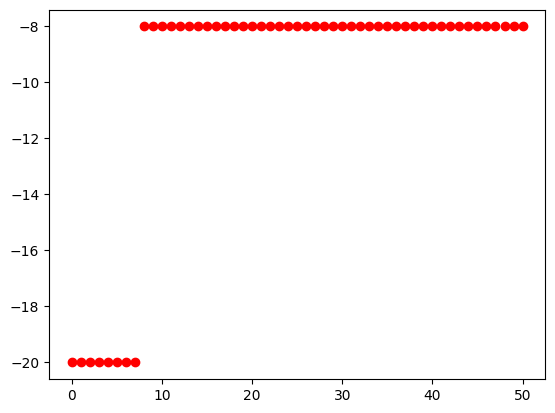

In [ ]:
# grid world parameters
size = (6, 6)
start_cell = (0, 0)
obstacles = [(3, 3), (1,1)]
terminating_state = (3, 5)
# q learning parameters
gamma = 0.9
# ----- What is the minimum required number of iterations? -----
iterations = 50

gw = GridWorld(size, start_cell, obstacles, terminating_state)
solver = DPsolver(gw, gamma, iterations)

while not solver.is_learning_finished():
    solver.step()
    sum_rewards = solver.sum_rewards[-1]
    print(sum_rewards)

sum_rewards = solver.trajectory()
print(sum_rewards)
plot_learning_curve(solver)